In [1]:
import pandas as pd
import numpy as np
from omadb import Client
import logging 
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import matplotlib.ticker as ticker 

In [2]:
## Replace all instances in the notebook of this names bellow with your own naming (here, we provide a list
## with the example naming provided in zenodo. If you use these ones, remember to also change them in the several
## instances where they appear bellow, or adapt the notebook so they won't cause trouble)

# metfol = ['Augustus', 'UniProt', 'topEnsembl', 'topNCBI']
# allmetfol = ['Augustus', 'UniProt', 'topNCBI', 'primNCBI', 'topEnsembl', 'primEnsembl']
metfol =['OMAAugustus20', 'OMARP20', 'OMAtopEnsembl20', 'OMAtopNCBI20']
allmetfol= ['OMAAugustus20', 'OMARP20', 'OMAtopNCBI20', 'OMAprimNCBI20', 'OMAtopEnsembl20', 'OMAprimEnsembl20']

## HOG statistics

In [3]:

### CHANGE THIS!!
wdir='/yourdirectory/whereall/OMAruns/are/'
####

Measure=['HOG_count', 'mean','std', 'min', '25%', '50%', '75%', 'max']
HOGstats=pd.DataFrame(data=Measure, columns=['Measure'])
hog_profiles_total= pd.DataFrame()

for m in metfol:
    working_dir =  wdir + m
    hog_profiles = pd.read_csv(working_dir + '/Output/PhyleticProfileHOGs.txt', skiprows=4, sep="\t")
    hog_profiles['total_nb_genes'] = hog_profiles.select_dtypes(include='number').sum(axis=1)
    
    tmp_series=hog_profiles['total_nb_genes'].describe()
    tmp_df=tmp_series.to_frame()
    current=tmp_df['total_nb_genes'].tolist()
    HOGstats[m]=current
    
    hog_profiles['Method']= m
    hog_profiles_total = pd.concat([hog_profiles_total, hog_profiles], ignore_index=True)

## HOG size distribution

Need to run the first HOG statistics cell first

In [4]:
mypaleta=['#BF812D', '#F6E8C3', '#C7EAE5', '#35978F']
colors=("tab:blue", "tab:orange", "tab:green", "tab:red" )
paleta2= ["#858e35", "#b13a40", "#54828a", "#b8713c"]

In [5]:
hog_profiles
hogprofilesplot = hog_profiles_total.loc[hog_profiles_total["Method"].isin(metfol)]
hogprofilesplot

,Group,CHICK,CHPIB,CIOIN,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,...,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR,total_nb_genes,Method
0,HOG00001,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
1,HOG00002,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
2,HOG00003,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
3,HOG00004,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
4,HOG00005,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,OMAAugustus20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133060,HOG26674,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20
133061,HOG26675,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20
133062,HOG26676,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20
133063,HOG26677,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,OMAtopNCBI20


In [69]:
#This is commented because the HOGsizestats.csv is precomputed. Uncomment if needed

#HOGsizestats=hogprofilesplot.groupby(['Method','total_nb_genes']).describe()
#savefig...

In [7]:
HOGsizestats=pd.read_csv('HOGsizestats.csv')

In [9]:
pd.set_option('display.max_rows', 116)
HOGsizestats

,Unnamed: 0,Unnamed: 1,CHICK,CHICK.1,CHICK.2,CHICK.3,CHICK.4,CHICK.5,CHICK.6,CHICK.7,...,TAEGU.6,TAEGU.7,XENTR,XENTR.1,XENTR.2,XENTR.3,XENTR.4,XENTR.5,XENTR.6,XENTR.7
0,NaN,NaN,count,mean,std,min,25%,50%,75%,max,...,75%,max,count,mean,std,min,25%,50%,75%,max
1,Method,total_nb_genes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OMAAugustus20,2,15095.0,0.05087777409738324,0.21975537634719522,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,15095.0,0.08022524014574363,0.27165058371104017,0.0,0.0,0.0,0.0,1.0
3,OMAAugustus20,3,4804.0,0.10116569525395504,0.30773005579324386,0.0,0.0,0.0,0.0,2.0,...,0.0,2.0,4804.0,0.11240632805995004,0.34789171474758046,0.0,0.0,0.0,0.0,2.0
4,OMAAugustus20,4,4209.0,0.15419339510572583,0.37473960749558716,0.0,0.0,0.0,0.0,3.0,...,0.0,3.0,4209.0,0.11546685673556664,0.37504217368253606,0.0,0.0,0.0,0.0,3.0
5,OMAAugustus20,5,3335.0,0.1793103448275862,0.4079196544039539,0.0,0.0,0.0,0.0,4.0,...,0.0,4.0,3335.0,0.11274362818590705,0.39325766162014586,0.0,0.0,0.0,0.0,4.0
6,OMAAugustus20,6,2042.0,0.16356513222331048,0.4053592752208247,0.0,0.0,0.0,0.0,5.0,...,0.0,5.0,2042.0,0.19049951028403525,0.5559775789981181,0.0,0.0,0.0,0.0,5.0
7,OMAAugustus20,7,1707.0,0.23491505565319273,0.4636866530761429,0.0,0.0,0.0,0.0,6.0,...,0.0,4.0,1707.0,0.22319859402460457,0.6037987093434546,0.0,0.0,0.0,0.0,6.0
8,OMAAugustus20,8,1328.0,0.35240963855421686,0.5712743651423074,0.0,0.0,0.0,1.0,5.0,...,1.0,3.0,1328.0,0.2710843373493976,0.6815523962562712,0.0,0.0,0.0,0.0,7.0
9,OMAAugustus20,9,1003.0,0.44466600199401796,0.5110348812077762,0.0,0.0,0.0,1.0,2.0,...,1.0,2.0,1003.0,0.3230309072781655,0.6711461180832665,0.0,0.0,0.0,1.0,8.0


In [10]:
# Extract the first row as the new column names
new_header = HOGsizestats.iloc[0]

# Set the new header as column names
HOGsizestats.columns = new_header

HOGsizestats = HOGsizestats[2:]

In [11]:
hogstwenty = hog_profiles_total.loc[hog_profiles_total["total_nb_genes"]==20]
hogsnineteen = hog_profiles_total.loc[hog_profiles_total["total_nb_genes"]==19]

In [12]:
hogstwenty['singlecopy']= hogstwenty.iloc[:, 1:21].all(1)
hogssinglecopy = hogstwenty[hogstwenty['singlecopy'] == True]

<ipython-input-12-abf8987886f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hogstwenty['singlecopy']= hogstwenty.iloc[:, 1:21].all(1)


In [13]:
hogsnineteen['scnociona']=hogsnineteen.iloc[:, list(range(1, 3)) + list(range(4, 21))].all(1)
hogsscnociona = hogsnineteen[hogsnineteen['scnociona'] == True]

<ipython-input-13-1d6308eed275>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hogsnineteen['scnociona']=hogsnineteen.iloc[:, list(range(1, 3)) + list(range(4, 21))].all(1)


In [14]:
singlecopystats=hogssinglecopy.groupby(['Method']).describe()
scnocionastats=hogsscnociona.groupby(['Method']).describe()

In [15]:
forplot=singlecopystats['CHICK']['count']
print(forplot)
print(type(forplot))
forplot = pd.DataFrame(forplot)

Method
OMAAugustus20       19.0
OMARP20            283.0
OMAtopEnsembl20    250.0
OMAtopNCBI20       621.0
Name: count, dtype: float64
<class 'pandas.core.series.Series'>


In [16]:
forplot.reset_index()

,Method,count
0,OMAAugustus20,19.0
1,OMARP20,283.0
2,OMAtopEnsembl20,250.0
3,OMAtopNCBI20,621.0


In [17]:
#20 usc hogs
data = {'Method': ['Ab-initio','RP UP', 'Ensembl', 'NCBI'],
        'Count': [19, 283, 250, 621]}

uschogs = pd.DataFrame(data)

#19 usc size hogs without ciona
data = {'Method': ['Ab-initio','RP UP', 'Ensembl', 'NCBI'],
        'Count': [29, 390, 342, 614]}

uschogs2 = pd.DataFrame(data)

In [18]:
uschogs.columns = ["Method", "Count20"]
uschogs2.columns=["Method", "Count19"]
allusc = pd.merge(uschogs, uschogs2, how='inner', on='Method')
allusc

,Method,Count20,Count19
0,Ab-initio,19,29
1,RP UP,283,390
2,Ensembl,250,342
3,NCBI,621,614


## Figure 1d) subplot (1:1 20 sized HOGs)

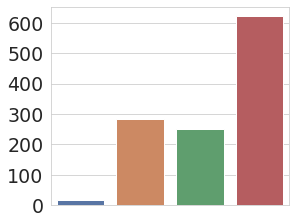

In [19]:
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(4, 3)) #

ax1=sns.barplot(data=allusc, y='Count20', x='Method', palette="deep", ax=ax1)

ax1.set_xlabel('')
ax1.set_xticklabels('')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(100)) 
ax1.tick_params(axis='y', labelsize=19) 

ax1.set_ylabel('')
#ax1.set_ylabel('Number of HOGs', fontsize=18, labelpad=4)

#ax1.set_title('HOGs with 19 Unique Single Copy genes', y=1.03, fontsize=14)
#ax2.set_title('HOGs with 20 USC genes', y=1.03, fontsize=14)

plt.tight_layout(pad=0.3)

#plt.savefig('20USCHogs.png',bbox_inches='tight')

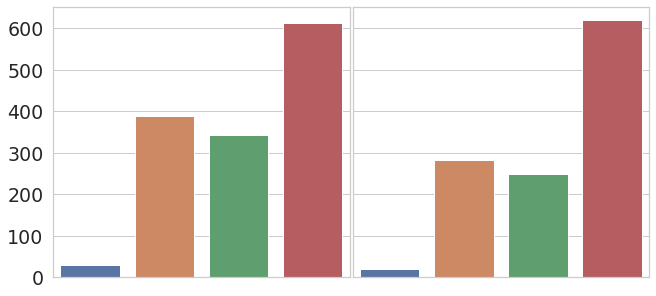

In [136]:
sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9, 4)) #

ax1=sns.barplot(data=allusc, y='Count19', x='Method', palette="deep", ax=ax1)
ax2=sns.barplot(data=allusc, y='Count20', x='Method', palette="deep", ax=ax2)

ax1.set_xlabel('')
ax1.set_xticklabels('')
ax2.set_xlabel('')
ax2.set_xticklabels('')
ax2.set_ylabel('')

ax1.tick_params(axis='y', labelsize=19) 

ax1.set_ylabel('')
#ax1.set_ylabel('Number of HOGs', fontsize=18, labelpad=4)

#ax1.set_title('HOGs with 19 Unique Single Copy genes', y=1.03, fontsize=14)
#ax2.set_title('HOGs with 20 USC genes', y=1.03, fontsize=14)

plt.tight_layout(pad=0.3)

#plt.savefig('USCHogs.png',bbox_inches='tight')

In [23]:
vividpalette=["#858e35", "#b13a40", "#54828a", "#b8713c"]
vivid2=["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]
vivid2=["green","red", "orange", "blue"]

In [9]:
selected_columns = hogsnineteen.iloc[:, list(range(1, 3)) + list(range(4, 21))]
selected_columns

,CHICK,CHPIB,DANRE,ECNAU,ERCAL,FELCA,GADMO,HUMAN,KAKAP,LEPOC,MOUSE,ORANA,ORYLA,PHOSI,PODMU,SALTR,SARHA,TAEGU,XENTR
2164,0,0,0,4,0,0,4,0,0,0,0,0,4,0,0,7,0,0,0
5495,0,0,1,3,0,0,4,0,0,0,0,0,9,0,0,2,0,0,0
8272,0,0,1,5,0,0,3,0,0,2,0,0,0,0,0,8,0,0,0
9926,0,0,1,4,2,0,5,0,0,1,0,0,4,0,0,2,0,0,0
11068,0,0,3,1,11,0,1,0,0,2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132617,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,2,1,1,1
132632,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
132635,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
132636,1,0,1,1,1,1,1,1,0,1,1,0,1,2,1,2,1,1,1


In [8]:
#HOGstats.to_csv('HOGstats.csv')

In [8]:
'''
Only necessary if coming from producing HOGstats
'''

HOGstats_inv= HOGstats.transpose()
new_header = HOGstats_inv.iloc[0] #grab the first row for the header
HOGstats_inv = HOGstats_inv[1:] #take the data less the header row
HOGstats_inv.columns = new_header.to_list() #set the header row as the df header

HOGstats_inv = HOGstats_inv.reset_index()
HOGstats_inv=HOGstats_inv.rename(columns={"index": "Method"})

In [7]:
#HOGstats_inv.to_csv('HOGstatsinv.csv')

In [19]:
HOGstats_inv=pd.read_csv('HOGstatsinv.csv')

## HOG quality measures

Generate tables for the HOG quality measures, across the 6 different annotation methods.

In [ ]:
from collections import Counter
from tqdm.auto import tqdm
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyham
import seaborn as sns

In [21]:
## Working directory for ancestral analysis:
# HOGs is a directory with 'species_tree_withname.nwk' and a txt file which includes the paths to
# all HierarchicalGroup.orthoxml files specified

awdir='/your/path/to/HOGs/'

In [22]:
tree_fn = awdir+'species_tree_withname.nwk'

# want to load the orthoxml files and label according to the method
# orthoxml_files.txt is a file with all the paths (one bellow another) to the HierarchicalGroups.orthoxml
with open(awdir+'./orthoxml_files.txt', 'rt') as fp:
    oxml_fns = {}
    for fn in fp.readlines():
        # strip new line char
        fn = fn.rstrip()

        # get method
        method = fn.split('/')[-3]
        
        # save
        oxml_fns[method] = fn

The hams take a bit of time to load

In [23]:
hams = {method: 
        pyham.Ham(
            tree_file=tree_fn,
            tree_format="newick",
            hog_file=oxml_fn,
            type_hog_file="orthoxml",
            filter_object=None,
            use_internal_name=True,
            #with_parser_progress=True,
        )
        for (method, oxml_fn) in tqdm(oxml_fns.items())}

100%|██████████| 6/6 [01:38<00:00, 16.43s/it]


Now we need to generate the branch pairs. This can be done using the tree that pyham has already loaded using ete3.

In [24]:
def get_branch_pairs(t):
    for parent in t.iter_search_nodes():
        for child in parent.get_children():
            branch_type = 'internal' if len(child.get_children()) > 0 else 'terminal'
            yield (parent.name, child.name, branch_type)
            
for key in hams:  #Silvia added this part to obtain branches_df out of hams dictionary of hams
    ham=hams[key]
    branches_df = pd.DataFrame(get_branch_pairs(ham.taxonomy.tree), columns=['parent_node', 'child_node', 'branch_type'])

In [27]:
# Number of rootHOGs:
len(hams['OMAtopNCBI20'].top_level_hogs.items())

26678

We then want to compute the number of events per root level HOG. We do this by considering the events on every single branch and collating them by root HOG (top level gene family).
Now we can load the statistics of the gene sets / HOG quality measures

In [25]:
def get_stats(ham, branches_df):
    hog_qual = []
    for (hog_id, hog) in tqdm(ham.top_level_hogs.items()):
        x = hog.get_all_descendant_genes_clustered_by_species()
        n_sp_in_hog = len(x.keys())
        n_genes_in_hog = sum(1 for _ in itertools.chain.from_iterable(x.values()))
        n_sp_below_root_level = len(hog.genome.taxon.get_leaf_names())
        q = n_sp_in_hog / n_sp_below_root_level    ##This is the completeness_score
        hog_qual.append((hog_id, q, n_sp_below_root_level, n_sp_in_hog, n_genes_in_hog, hog.genome.name))

    df = pd.DataFrame(hog_qual, columns=['hog_id', 'completeness_score', 'n_species_below_root', 'n_species_observed', 'n_members', 'root_level'])

    # count implied losses
    implied_losses = Counter()
    duplication_events = Counter()
    stats = []
    for (branch_type, zdf) in branches_df.groupby('branch_type'):
        for (_, b) in zdf.iterrows():
            parent_genome = ham.get_ancestral_genome_by_name(b['parent_node'])
            if branch_type == 'internal':
                child_genome = ham.get_ancestral_genome_by_name(b['child_node'])
            else:
                child_genome = ham.get_extant_genome_by_name(b['child_node'])

            vmap = ham.compare_genomes_vertically(child_genome, parent_genome)

            # count the loss events per-family
            for g in vmap.get_lost():
                fam_id = int(g.get_top_level_hog().hog_id)
                implied_losses[fam_id] += 1

            # count the duplication events per-family
            for (g_p, g_c) in vmap.get_duplicated().items():
                fam_id = int(g_p.get_top_level_hog().hog_id)
                # number of duplication events
                duplication_events[fam_id] += (len(g_c) - 1)

            # also want to gather the statistics about the size of each of the sets
            x = {'parent_node': b['parent_node'],
                 'child_node': b['child_node'],
                 'retained_head': len(vmap.get_retained().values()),
                 'retained_tail': len(vmap.get_retained().keys()),
                 'gained': len(vmap.get_gained()),
                 'duplicated_head': len(list(itertools.chain.from_iterable(vmap.get_duplicated().values()))),
                 'duplicated_tail': len(vmap.get_duplicated().keys()),
                 'lost': len(vmap.get_lost()),
                 'parent_genome_size': len(parent_genome.genes),
                 'child_genome_size': len(child_genome.genes),
                 'branch_type': branch_type}
            stats.append(x)

    branch_stats = pd.DataFrame(stats)

    df['implied_losses'] = df['hog_id'].apply(lambda x: implied_losses[int(x)])
    df['duplication_events'] = df['hog_id'].apply(lambda x: duplication_events[int(x)])
    df['norm_losses'] = (df['implied_losses'] / df['n_members'])
    df['norm_loss_events'] = (df['implied_losses'] / df['n_species_below_root'])
    
    # losses + duplications
    df['n_events'] = df['implied_losses'] + df['duplication_events']
    
    # gather the ancestral genome sizes, as well.
    genes_in_hogs = {'ancestral': dict(map(lambda x: (x.name, len(x.genes)), ham.get_list_ancestral_genomes())),
                     'extant': dict(map(lambda x: (x.name, len(list(filter(lambda x: not x.is_singleton(), x.genes)))), ham.get_list_extant_genomes()))}
                    
    
    return {'branch_stats': branch_stats,
            'hog_stats': df,
            'genes_in_hogs': genes_in_hogs}

In [26]:
stats = {}
for (method, ham) in hams.items():
    stats[method] = get_stats(ham, branches_df)

100%|██████████| 45153/45153 [00:00<00:00, 48731.80it/s] 


## Number of genes in HOGs

In [27]:
def get_hogmembership_distn(stats):
    def get():
        for (method, method_stats) in stats.items():
            yield from zip(itertools.repeat(method),
                           itertools.repeat('Ancestral'),
                           method_stats['genes_in_hogs']['ancestral'].values())
            yield from zip(itertools.repeat(method),
                           itertools.repeat('Extant'),
                           method_stats['genes_in_hogs']['extant'].values())
    return pd.DataFrame(get(), columns=['Method', 'Branch Type', 'No. genes present in HOGs'])

In [28]:
in_hog_distn = get_hogmembership_distn(stats)

In [29]:
in_hog_plot= pd.DataFrame()
for m in metfol:
    in_hog_tmp = in_hog_distn.loc[in_hog_distn["Method"]== m]
    in_hog_plot= pd.concat([in_hog_plot, in_hog_tmp], ignore_index=True)

In [30]:
in_hog_anc_plot= in_hog_plot.loc[in_hog_plot["Branch Type"]=='Ancestral']
in_hog_ext_plot=in_hog_plot.loc[in_hog_plot["Branch Type"]=='Extant']

In [31]:
ext_hogs_descr=pd.DataFrame()
for m in metfol:
    tmp_df=in_hog_ext_plot.loc[in_hog_ext_plot['Method']==m]
    ext_hogs_descr[m]=tmp_df.describe()['No. genes present in HOGs']
    ext_hogs_descr[m]

In [32]:
ext_hogs_descr.transpose()

,count,mean,std,min,25%,50%,75%,max
OMAAugustus20,20.0,17325.35,6797.009554,4660.0,14207.25,14987.5,18816.50,34969.0
OMARP20,20.0,18825.55,5725.142549,6182.0,16613.50,18450.5,20533.00,38076.0
OMAtopEnsembl20,20.0,19433.05,6192.283955,6194.0,16570.25,18792.5,21328.75,39311.0
OMAtopNCBI20,20.0,19371.10,5676.373118,6554.0,17103.75,18991.5,20596.75,38200.0


In [33]:
anc_hogs_descr=pd.DataFrame()
for m in metfol:
    tmp_df=in_hog_anc_plot.loc[in_hog_anc_plot['Method']==m]
    anc_hogs_descr[m]=tmp_df.describe()['No. genes present in HOGs']

In [34]:
anc_hogs_descr.transpose()

,count,mean,std,min,25%,50%,75%,max
OMAAugustus20,19.0,22971.315789,6019.015285,4228.0,20821.5,23449.0,26977.0,30881.0
OMARP20,19.0,20467.368421,4384.690844,5428.0,19702.0,20396.0,22450.0,26967.0
OMAtopEnsembl20,19.0,20697.684211,4462.545114,5465.0,20125.5,20885.0,22683.0,27316.0
OMAtopNCBI20,19.0,19528.894737,3984.439984,5714.0,19256.5,19856.0,21202.0,25189.0


## HOG completeness distribution

In [35]:
def get_hogcompletness_distn(stats):
    def get():
        for (method, method_stats) in stats.items():
            yield from zip(itertools.repeat(method),
                           method_stats['hog_stats'].completeness_score)
            
    return pd.DataFrame(get(), columns=['Method', 'HOG Completeness Score'])

In [36]:
hogcompleteness = get_hogcompletness_distn(stats)

In [37]:
stcompleteness=pd.DataFrame()
for m in metfol:
    tmp_df=hogcompleteness.loc[hogcompleteness['Method']==m]
    stcompleteness[m]=tmp_df.describe()['HOG Completeness Score']

In [38]:
stcompleteness

,OMAAugustus20,OMARP20,OMAtopEnsembl20,OMAtopNCBI20
count,45153.000000,30658.000000,30576.000000,26678.000000
mean,0.559084,0.714073,0.712381,0.770784
std,0.295619,0.297238,0.301499,0.292027
min,0.100000,0.100000,0.100000,0.100000
25%,0.315789,0.500000,0.473684,0.545455
50%,0.500000,0.833333,0.833333,0.947368
75%,0.818182,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [39]:
hogcompleteness_plot= pd.DataFrame()
for m in metfol:
    hogcompleteness_tmp = hogcompleteness.loc[hogcompleteness["Method"]== m]
    hogcompleteness_plot= pd.concat([hogcompleteness_plot, hogcompleteness_tmp], ignore_index=True)

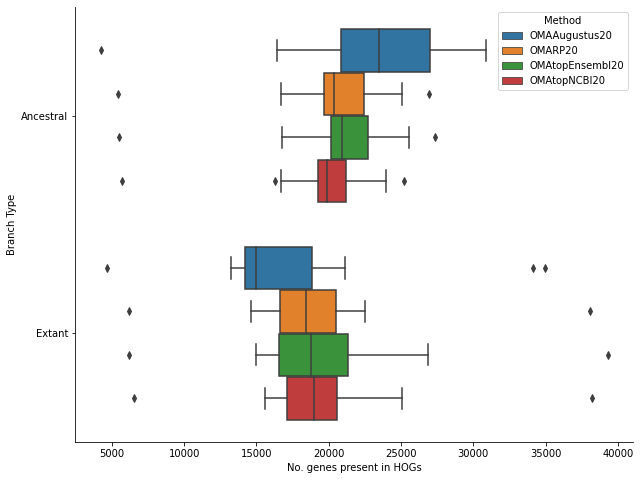

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(in_hog_plot, x='No. genes present in HOGs', y='Branch Type', hue='Method')
sns.despine()

In [41]:
methodsrename=pd.DataFrame({'Software': ['OMAAugustus20', 'OMARP20', 'OMAprimEnsembl20','OMAtopEnsembl20','OMAprimNCBI20','OMAtopNCBI20'], 
                           'Method':['Ab-initio', 'RP UP', 'primEnsembl', 'Ensembl','primNCBI', 'NCBI']})
HOGstats_inv['Method']= HOGstats_inv['Method'].map(methodsrename.set_index('Software')['Method'])


In [42]:
#in_hog_ext_plot['Method']= in_hog_ext_plot['Method'].map(methodsrename.set_index('Software')['Method'])
#in_hog_anc_plot['Method']= in_hog_anc_plot['Method'].map(methodsrename.set_index('Software')['Method'])
hogcompleteness_plot['Method']= hogcompleteness_plot['Method'].map(methodsrename.set_index('Software')['Method'])

In [113]:
#in_hog_ext_plot.rename(columns = {'No. genes present in HOGs':'No. genes present in HOGs in extant species'}, inplace = True)
#in_hog_anc_plot.rename(columns = {'No. genes present in HOGs':'No. genes present in HOGs in ancestral species'}, inplace = True)

<ipython-input-113-45cdba2f77ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_hog_ext_plot.rename(columns = {'No. genes present in HOGs':'No. genes present in HOGs in extant species'}, inplace = True)


In [43]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [44]:
mypaleta=['#BF812D', '#F6E8C3', '#C7EAE5','#35978F']

In [45]:
set(in_hog_anc_plot['Method'])

{'OMAAugustus20', 'OMARP20', 'OMAtopEnsembl20', 'OMAtopNCBI20'}

In [47]:
methodsrename=pd.DataFrame({'Software': ['OMAAugustus20', 'OMARP20', 'OMAtopEnsembl20','OMAtopNCBI20'], 
                           'Method':['Ab-initio', 'Reference proteomes UniProt', 'Ensembl', 'NCBI']})
in_hog_anc_plot['Method']= in_hog_anc_plot['Method'].map(methodsrename.set_index('Software')['Method'])

<ipython-input-47-0c16aaa00905>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_hog_anc_plot['Method']= in_hog_anc_plot['Method'].map(methodsrename.set_index('Software')['Method'])


In [59]:
stats2=pd.read_csv('ProtLengthStats_canonical_4methods_2.csv')
stats2['Method'] = stats2['Method'].replace('Reference proteomes\n UniProt', 'Reference proteomes UniProt')
extotalgenes=stats2.loc[:, ["Method", "count"]]
extotalgenes['Branch Type']='Extant'

In [60]:
new_names = {'count': 'Number of genes'}
extotalgenes.rename(columns=new_names, inplace=True)

In [61]:
new_order=['Method', 'Branch Type', 'Number of genes']
extotalgenes=extotalgenes[new_order]

In [62]:
new_name={'No. genes present in HOGs': 'Number of genes'}
in_hog_anc_plot2=in_hog_anc_plot.rename(columns=new_name)

In [58]:
set(in_hog_anc_plot2['Method'])

{'Ab-initio', 'Ensembl', 'NCBI', 'Reference proteomes UniProt'}

In [63]:
gene_numbers=pd.concat([in_hog_anc_plot2, extotalgenes])

In [54]:
set(hogprofilesplot['Method'])

{'OMAAugustus20', 'OMARP20', 'OMAtopEnsembl20', 'OMAtopNCBI20'}

In [55]:
methodsrename=pd.DataFrame({'Software': ['OMAAugustus20', 'OMARP20', 'OMAtopEnsembl20','OMAtopNCBI20'], 
                           'Method':['Ab-initio', 'UniProt', 'Ensembl', 'NCBI']})
hogprofilesplot['Method']= hogprofilesplot['Method'].map(methodsrename.set_index('Software')['Method'])

In [64]:
set(gene_numbers['Method'])

{'Ab-initio', 'Ensembl', 'NCBI', 'Reference proteomes UniProt'}

In [65]:
mypaleta=['#BF812D', '#F6E8C3', '#C7EAE5', '#35978F']
ancext=["#8F3931FF", "lightcoral"]

### HOGs quality figure version 2 (This is an extension of Figure 4 - which is bellow)

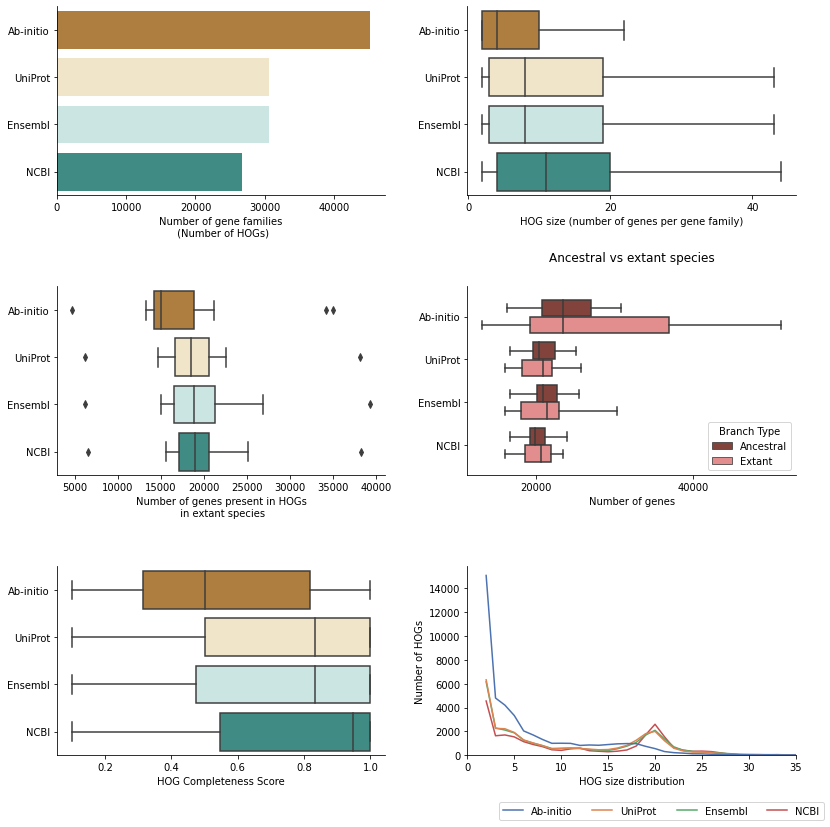

In [66]:
fig , ((ax1, ax2), (ax3, ax4), (ax5, ax6))= plt.subplots(nrows= 3, ncols=2, figsize=(12,12))

#HOGstats_inv['CI_Lower'] = HOGstats_inv['mean'] - HOGstats_inv['sem']
#HOGstats_inv['CI_Upper'] = HOGstats_inv['mean'] + HOGstats_inv['sem']

#ax1 = Number of HOGs
ax1 = sns.barplot(data=HOGstats_inv, y='Method', x='HOG_count', ax=ax1, palette=mypaleta)

#ax2: HOG size distribution
ax2= sns.boxplot(data=hogprofilesplot, y='Method', x='total_nb_genes', ax=ax2, palette= mypaleta, showfliers=False)


# AX3: number of genes in HOGs in extant species
ax3 = sns.boxplot(in_hog_ext_plot, x='No. genes present in HOGs', y='Method', ax=ax3, palette='BrBG')


#ax4: ancestral vs extant species number of genes
ax4= sns.boxplot(gene_numbers, x='Number of genes', y='Method', hue='Branch Type', ax=ax4, palette=ancext, showfliers=False)

#ax5: n of HOGs
ax5=  sns.boxplot(data=hogcompleteness_plot, x='HOG Completeness Score', y='Method', ax=ax5, palette='BrBG')


# ax6 HOG completeness
ax6= sns.histplot(hogprofilesplot, hue='Method', x='total_nb_genes', palette="deep", element='poly', 
                  fill = False, discrete=True, ax=ax6)


#ax2.set_xlim((0,35))
#ax4.set_xlim((3000, 60000))
ax6.set_xlim((0, 35))
sns.despine()

ax1.set_xlabel('Number of gene families\n (Number of HOGs)')
ax2.set_xlabel('HOG size (number of genes per gene family)')
ax3.set_xlabel('Number of genes present in HOGs\n in extant species')
ax6.set_xlabel('HOG size distribution')

ax2.locator_params(axis='both', nbins=4)
ax4.locator_params(axis='both', nbins=4)

ax1.set_yticklabels(('Ab-initio', 'UniProt', 'Ensembl', 'NCBI'))
ax2.set_yticklabels(('Ab-initio', 'UniProt', 'Ensembl', 'NCBI'))
ax3.set_yticklabels(('Ab-initio', 'UniProt', 'Ensembl', 'NCBI'))
ax4.set_yticklabels(('Ab-initio', 'UniProt', 'Ensembl', 'NCBI'))
ax5.set_yticklabels(('Ab-initio', 'UniProt', 'Ensembl', 'NCBI'))

legend = ax6.get_legend()
handles = legend.legend_handles
legend.remove()
ax6.legend(handles, ['Ab-initio', 'UniProt', 'Ensembl', 'NCBI'], bbox_to_anchor=(1.1, -0.22), ncol=4)

ax1.set(ylabel=None)
ax2.set(ylabel=None)
ax3.set(ylabel=None)
ax4.set(ylabel=None)
ax5.set(ylabel=None)
ax6.set(ylabel='Number of HOGs')

#fig.supylabel('Annotation method', x= 0.03, fontsize=14)



ax4.set_title('Ancestral vs extant species', y= 1.1)
plt.tight_layout(pad=2.5)

#plt.savefig('HOG_stats3_tmp.png',bbox_inches='tight')

In [96]:
hogcompleteness_plot

,Method,HOG Completeness Score
0,Ab initio,1.0
1,Ab initio,1.0
2,Ab initio,1.0
3,Ab initio,1.0
4,Ab initio,1.0
...,...,...
133060,OMAtopNCBI20,0.1
133061,OMAtopNCBI20,0.1
133062,OMAtopNCBI20,0.1
133063,OMAtopNCBI20,0.1


## Figure 4

In [69]:
import matplotlib.ticker as ticker 

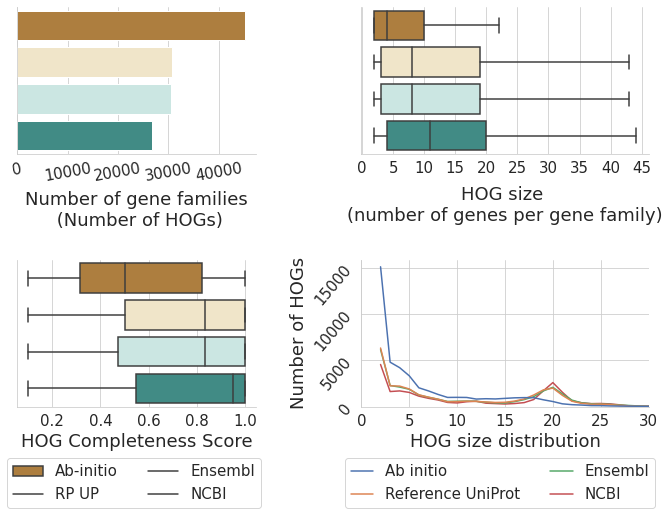

In [67]:
sns.set_style("whitegrid")

width_ratios = [1, 1.2]
fig , ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows= 2, ncols=2, 
                                             figsize=(10,8),gridspec_kw={'width_ratios': width_ratios})

#ax1 = Number of HOGs
ax1 = sns.barplot(data=HOGstats_inv, y='Method', x='HOG_count', ax=ax1, palette=mypaleta)

#ax2: HOG size distribution
ax2= sns.boxplot(data=hogprofilesplot, y='Method', x='total_nb_genes', ax=ax2, palette= mypaleta, showfliers=False)


#ax5: n of HOGs
ax3=sns.boxplot(data=hogcompleteness_plot, x='HOG Completeness Score', y='Method', ax=ax3, palette='BrBG')


# ax6 HOG completeness
ax4=sns.histplot(hogprofilesplot, hue='Method', x='total_nb_genes', palette="deep", element='poly', 
                  fill = False, discrete=True, ax=ax4)


#ax2.set_xlim((0,35))
#ax4.set_xlim((3000, 60000))
ax4.set_xlim((0, 30))
sns.despine()

ax1.set_xlabel('Number of gene families\n (Number of HOGs)', fontsize=18, labelpad=7)
ax2.set_xlabel('HOG size \n(number of genes per gene family)', fontsize=18, labelpad=10)
ax3.set_xlabel('HOG Completeness Score', fontsize=18)
ax4.set_xlabel('HOG size distribution', fontsize=18)

ax2.locator_params(axis='both', nbins=4)


ax1.tick_params(axis='x', labelsize=15, rotation=10)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(5)) 
ax2.tick_params(axis='x', labelsize=15)
ax3.tick_params(axis='x', labelsize=15)

ax4.xaxis.set_major_locator(ticker.MultipleLocator(5)) 
ax4.tick_params(axis='x', labelsize=15)

ax1.set_yticklabels('')
ax2.set_yticklabels('')
ax3.set_yticklabels('')

ax4.tick_params(axis='y', labelsize=15, rotation=50)

method_labels = ['Ab initio', 'UniProt', 'NCBI', 'Ensembl']
ax3.legend(labels=hogcompleteness_plot['Method'].unique(), 
           bbox_to_anchor=(1.05, -0.3), fontsize=15, ncols=2)

legend = ax4.get_legend()
handles = legend.legend_handles
legend.remove()
ax4.legend(handles, ['Ab initio', 'Reference UniProt', 'Ensembl', 'NCBI'], 
           bbox_to_anchor=(1.05, -0.3), ncol=2, fontsize=15, handlelength=1.5)

ax1.set(ylabel=None)
ax2.set(ylabel=None)
ax3.set(ylabel=None)
ax4.set_ylabel('Number of HOGs', fontsize=18)

#fig.supylabel('Annotation method', x= 0.03, fontsize=14)


plt.tight_layout(pad=3)
#plt.savefig('HOG_stats3_reduced.png',bbox_inches='tight')

### No cutoff/ yes fliers supplementary (Fig. S4)


[Text(0.5, 288.20727272727277, 'HOG sizes\n (number of genes per HOG)')]

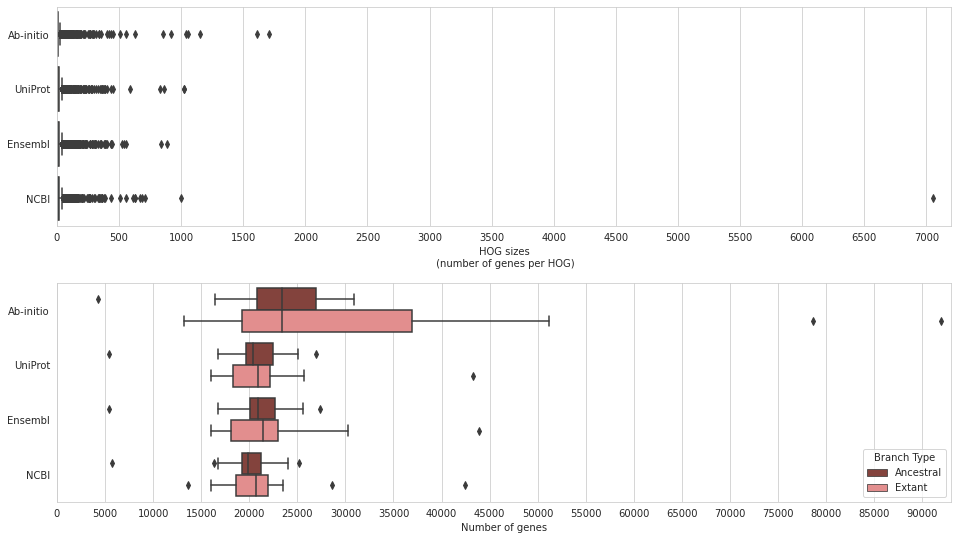

In [68]:
fig ,(ax1, ax2)= plt.subplots(nrows= 2, ncols=1, figsize=(14,8))

ax1= sns.boxplot(data=hogprofilesplot, y='Method', x='total_nb_genes', ax=ax1, palette= mypaleta)
ax2= sns.boxplot(gene_numbers, x='Number of genes', y='Method', hue='Branch Type', ax=ax2, palette=ancext)

ax2.set_yticklabels(('Ab-initio', 'UniProt', 'Ensembl', 'NCBI'))

plt.tight_layout(pad=2.5)

ax1.set_xlim((0,7200))
ax1.xaxis.set_ticks(np.arange(0, 7500, 500))
ax2.set_xlim((0,93000))
ax2.xaxis.set_ticks(np.arange(0, 95000, 5000))

ax1.set(ylabel='')
ax2.set(ylabel='')

ax1.set(xlabel= 'HOG sizes\n (number of genes per HOG)')

#plt.savefig('HOGfigsWITHFliers.png')